In [48]:
from   faraway.datasets import (
    prostate as p, sat as s, teengamb as tg, uswages)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
print(tg.DESCR)


Study of teenage gambling in Britain

Description:

     The ‘teengamb’ data frame has 47 rows and 5 columns. A survey was
     conducted to study teenage gambling in Britain.

Variables:

     This data frame contains the following columns:

     ‘sex’ 0=male, 1=female

     ‘status’ Socioeconomic status score based on parents' occupation

     ‘income’ in pounds per week

     ‘verbal’ verbal score in words out of 12 correctly defined

     ‘gamble’ expenditure on gambling in pounds per year

Source:

     Ide-Smith & Lea, 1988, Journal of Gambling Behavior, 4, 110-118



In [3]:
teen = tg.load()
teen.head()

,sex,status,income,verbal,gamble
0,1,51,2.0,8,0.0
1,1,28,2.5,8,0.0
2,1,37,2.0,6,0.0
3,1,28,7.0,4,7.3
4,1,65,2.0,8,19.6


In [4]:
teen.sex = teen.sex.apply(lambda x: 'female' if x else 'male')
teen.sex.value_counts()

male      28
female    19
Name: sex, dtype: int64

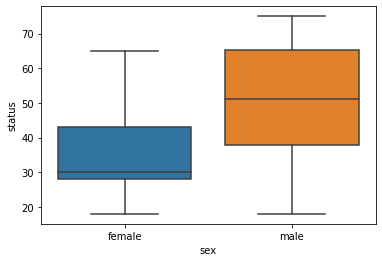

In [5]:
sns.boxplot(x='sex', y='status', data=teen);

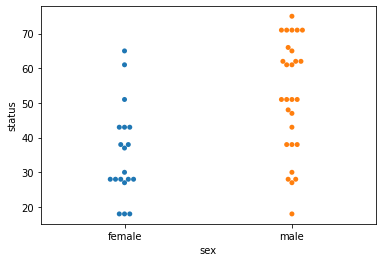

In [6]:
sns.swarmplot(x='sex', y='status', data=teen);

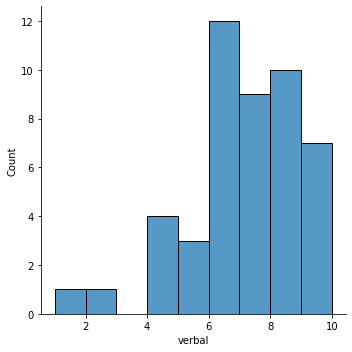

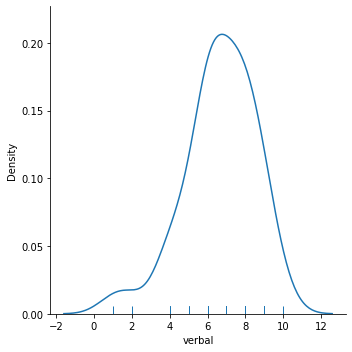

In [7]:
sns.displot(teen.verbal)
sns.displot(teen.verbal, kind='kde', rug=True);

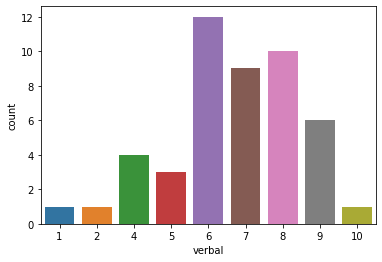

In [8]:
sns.countplot(x=teen.verbal);

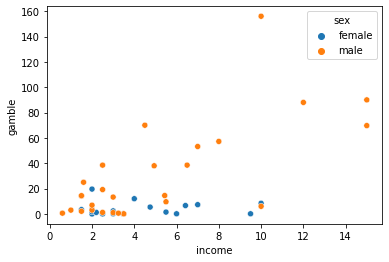

In [9]:
sns.scatterplot(x='income', y='gamble', data=teen, hue='sex');

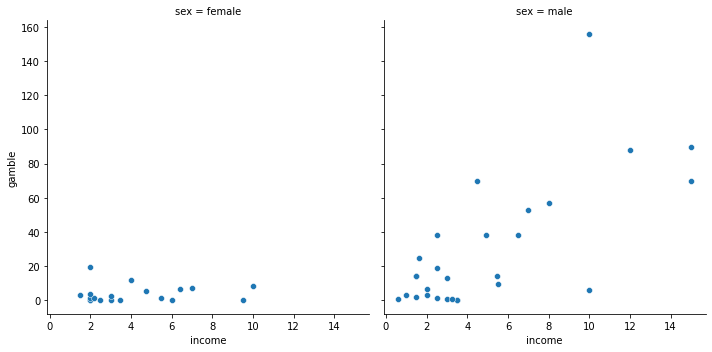

In [10]:
sns.relplot(x='income', y='gamble', data=teen, col='sex');

In [11]:
teen.describe()

,status,income,verbal,gamble
count,47.000000,47.000000,47.000000,47.000000
mean,45.234043,4.641915,6.659574,19.301064
std,17.262944,3.551371,1.856558,31.515866
min,18.000000,0.600000,1.000000,0.000000
25%,28.000000,2.000000,6.000000,1.100000
50%,43.000000,3.250000,7.000000,6.000000
75%,61.500000,6.210000,8.000000,19.400000
max,75.000000,15.000000,10.000000,156.000000


In [12]:
print(uswages.DESCR)


Weekly wages of US male workers in 1988

Description:

     The ‘uswages’ data frame has 2000 rows and 10 columns. Weekly
     Wages for US male workers sampled from the Current Population
     Survey in 1988.

Variables:

     This data frame contains the following columns:

     ‘wage’ Real weekly wages in dollars (deflated by personal
          consumption expenditures - 1992 base year)

     ‘educ’ Years of education

     ‘exper’ Years of experience

     ‘race’ 1 if Black, 0 if White (other races not in sample)

     ‘smsa’ 1 if living in Standard Metropolitan Statistical Area, 0 if
          not

     ‘ne’ 1 if living in the North East

     ‘mw’ 1 if living in the Midwest

     ‘we’ 1 if living in the West

     ‘so’ 1 if living in the South

     ‘pt’ 1 if working part time, 0 if not

Source:

     Bierens, H.J., and D. Ginther (2001): "Integrated Conditional
     Moment Testing of Quantile Regression Models", Empirical Economics
     26, 307-324



In [13]:
usw = uswages.load()
usw.head()

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
0,771.60,18,18,0,1,1,0,0,0,0
1,617.28,15,20,0,1,0,0,0,1,0
2,957.83,16,9,0,1,0,0,1,0,0
3,617.28,12,24,0,1,1,0,0,0,0
4,902.18,14,12,0,1,0,1,0,0,0


In [14]:
sub = usw[['wage', 'ne', 'mw', 'so', 'we']]
sub.head()

,wage,ne,mw,so,we
0,771.60,1,0,0,0
1,617.28,0,0,0,1
2,957.83,0,0,1,0
3,617.28,1,0,0,0
4,902.18,0,1,0,0


In [15]:
ne_mean_wage = sub[sub['ne'] == 1].wage.mean()
ne_mean_wage

631.6590829694322

In [16]:
sub.groupby('ne').agg('mean')['wage']

ne
0    601.125726
1    631.659083
Name: wage, dtype: float64

In [17]:
sub.drop('wage', axis=1).sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Length: 2000, dtype: int64

In [18]:
def region_from_dummies(row):
    regions = ['ne', 'mw', 'so', 'we']
    return regions[row[-4:].argmax()]

In [19]:
region = sub.apply(region_from_dummies, axis=1)
region

0       ne
1       we
2       so
3       ne
4       mw
        ..
1995    mw
1996    we
1997    ne
1998    ne
1999    so
Length: 2000, dtype: object

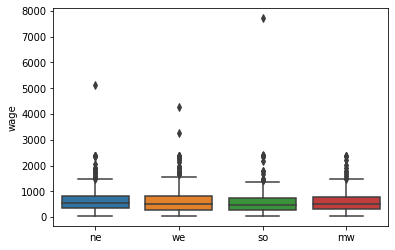

In [20]:
sns.boxplot(x=region, y=sub.wage);

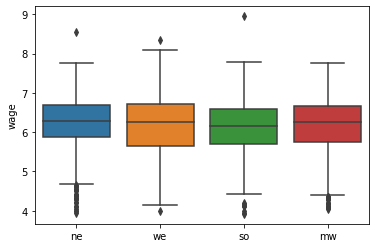

In [21]:
sns.boxplot(x=region, y=np.log(sub.wage));

In [22]:
print(p.DESCR)


Prostate cancer surgery

Description:

     The ‘prostate’ data frame has 97 rows and 9 columns. A study on 97
     men with prostate cancer who were due to receive a radical
     prostatectomy.

Variables:

     This data frame contains the following columns:

     ‘lcavol’ log(cancer volume)

     ‘lweight’ log(prostate weight)

     ‘age’ age

     ‘lbph’ log(benign prostatic hyperplasia amount)

     ‘svi’ seminal vesicle invasion

     ‘lcp’ log(capsular penetration)

     ‘gleason’ Gleason score

     ‘pgg45’ percentage Gleason scores 4 or 5

     ‘lpsa’ log(prostate specific antigen)

Source:

     Andrews DF and Herzberg AM (1985): Data. New York: Springer-Verlag



In [23]:
prostate = p.load()
prostate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156


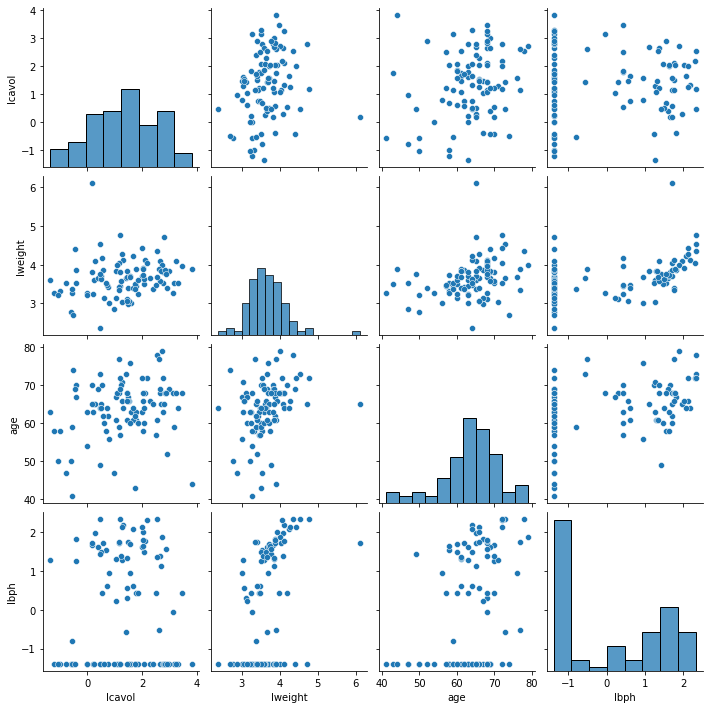

In [24]:
use = ['lcavol', 'lweight', 'age', 'lbph']
sns.pairplot(prostate[use]);

In [25]:
for i, p1 in enumerate(use):
    if p1 == 'lbph':
        break
    for j in range(i + 1, len(use)):
        p2 = use[j]
        cor = prostate[p1].corr(prostate[p2])
        print(f'{p1:7s}, {p2:7s}: {cor:.4f}')

lcavol , lweight: 0.1941
lcavol , age    : 0.2250
lcavol , lbph   : 0.0273
lweight, age    : 0.3075
lweight, lbph   : 0.4349
age    , lbph   : 0.3502


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


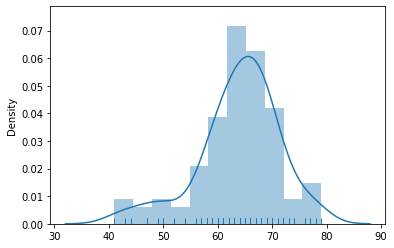

In [26]:
sns.distplot(x=prostate.age, rug=True);

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


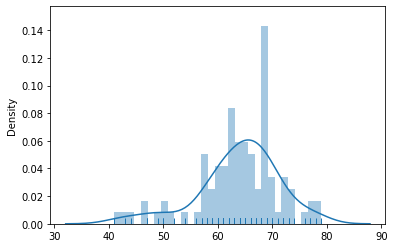

In [27]:
sns.distplot(x=prostate.age, bins=len(prostate.age.unique()), rug=True);

In [28]:
prostate_long = pd.melt(prostate[use + ['lpsa']], id_vars='lpsa')
prostate_long.head()

,lpsa,variable,value
0,-0.43078,lcavol,-0.579819
1,-0.16252,lcavol,-0.994252
2,-0.16252,lcavol,-0.510826
3,-0.16252,lcavol,-1.203973
4,0.37156,lcavol,0.751416


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


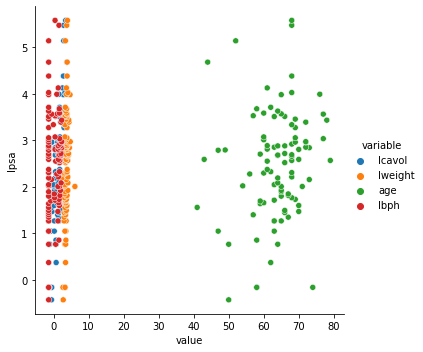

In [29]:
sns.relplot('value', 'lpsa', 'variable', data=prostate_long);

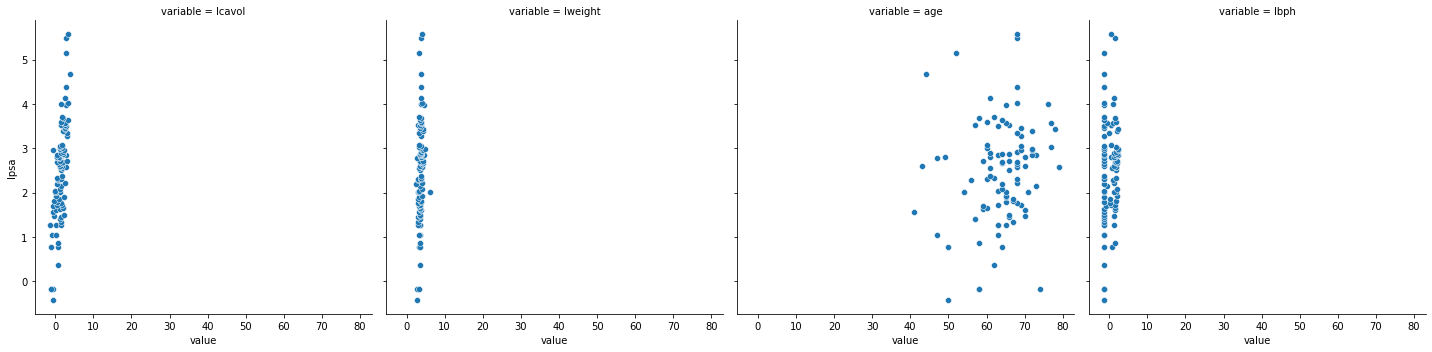

In [30]:
sns.relplot(x='value', y='lpsa', col='variable', data=prostate_long);

In [32]:
print(s.DESCR)


School expenditure and test scores from USA in 1994-95

Description:

     The ‘sat’ data frame has 50 rows and 7 columns.  Data were
     collected to study the relationship between expenditures on public
     education and test results.

Variables:

     This data frame contains the following columns:

     ‘expend’ Current expenditure per pupil in average daily attendance
          in public elementary and secondary schools, 1994-95 (in
          thousands of dollars)

     ‘ratio’ Average pupil/teacher ratio in public elementary and
          secondary schools, Fall 1994

     ‘salary’ Estimated average annual salary of teachers in public
          elementary and secondary schools, 1994-95 (in thousands of
          dollars)

     ‘takers’ Percentage of all eligible students taking the SAT,
          1994-95

     ‘verbal’ Average verbal SAT score, 1994-95

     ‘math’ Average math SAT score, 1994-95

     ‘total’ Average total score on the SAT, 1994-95

Source:

     "Getting Wha

In [33]:
sat = s.load()
sat.head()

,expend,ratio,salary,takers,verbal,math,total
0,4.405,17.2,31.144,8,491,538,1029
1,8.963,17.6,47.951,47,445,489,934
2,4.778,19.3,32.175,27,448,496,944
3,4.459,17.1,28.934,6,482,523,1005
4,4.992,24.0,41.078,45,417,485,902


In [35]:
(sat.verbal + sat.math == sat.total).all()

True

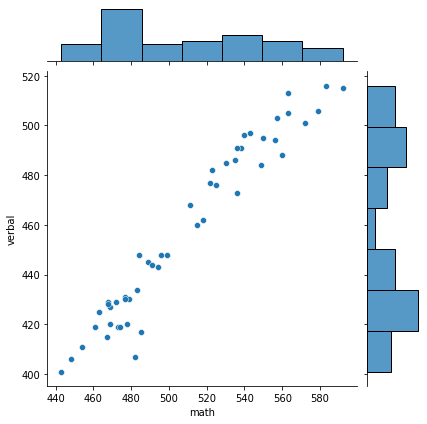

In [37]:
sns.jointplot(x='math', y='verbal', data=sat);

In [40]:
def standardize(x):
    mu = x.mean()
    sig = x.std()
    return (x - mu) / sig

In [55]:
sat['verbal_std'] = standardize(sat.verbal)
sat['math_std'] = standardize(sat.math)

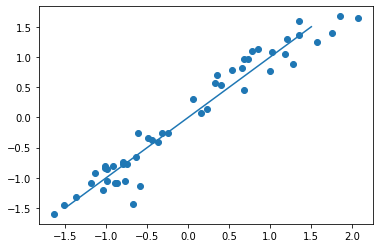

In [47]:
plt.scatter(math_std, verbal_std);
plt.plot([-1.5, 1.5], [-1.5, 1.5]);

In [58]:
mod = smf.ols('math_std ~ verbal_std', sat).fit()
mod.params

Intercept     6.730727e-16
verbal_std    9.702560e-01
dtype: float64

In [59]:
def predict_math(verbal):
    return 6.730727e-16 + 9.702560e-01*verbal

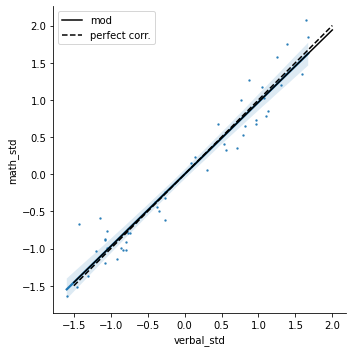

In [63]:
sns.lmplot(x='verbal_std', 
           y='math_std', 
           data=sat, 
           ci=95, 
           scatter_kws={'s': 2});
extrema = [-1.5, 2]
plt.plot(
    extrema, [predict_math(v) for v in extrema], color='k', label='mod')
plt.plot(extrema, extrema, 'k--', label='perfect corr.')
plt.legend();

In [64]:
sat.math.corr(sat.verbal)

0.9702560357417351

In [65]:
predict_math(0), predict_math(2)

(6.730727e-16, 1.9405120000000007)